In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import geopandas as gpd

from rainreporter.reporter import RainReporter
from rainreporter.reporter_map import MapReporter
from raindownloader.inpeparser import INPEParsers

In [4]:
reporter = RainReporter(
    server=INPEParsers.FTPurl, 
    download_folder='/workspaces/INPERainDownloader/tmp', 
    parsers=INPEParsers.parsers,
    post_processors=INPEParsers.post_processors,
    config_file='../rainreporter/reporter.json5'
)


In [5]:
mapreporter = reporter.map_reporter

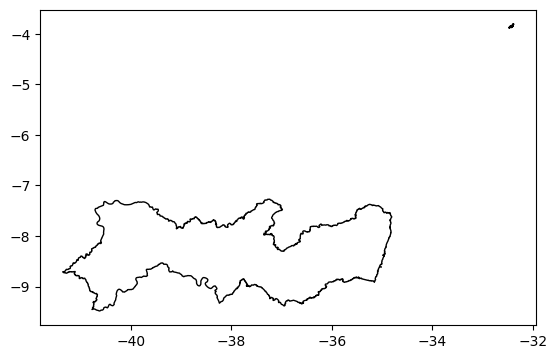

In [6]:
shp = mapreporter.shapes['states']['gdf']

shp = shp.iloc[10:11]
# style = {'color': 'red', 'markersize': 2}
style = {}
ax = shp.plot(facecolor='none', **style)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [7]:
xmin, xmax, ymin, ymax = ax.axis()
ax.set_xlim(xlim)
ax.set_ylim(ylim)


(-9.766811203249958, -3.520708477749981)

In [8]:
ax.set_ylim?

Signature:
ax.set_ylim(
    bottom=None,
    top=None,
    *,
    emit=True,
    auto=False,
    ymin=None,
    ymax=None,
)
Docstring:
Set the y-axis view limits.

Parameters
----------
bottom : float, optional
    The bottom ylim in data coordinates. Passing *None* leaves the
    limit unchanged.

    The bottom and top ylims may also be passed as the tuple
    (*bottom*, *top*) as the first positional argument (or as
    the *bottom* keyword argument).

    .. ACCEPTS: (bottom: float, top: float)

top : float, optional
    The top ylim in data coordinates. Passing *None* leaves the
    limit unchanged.

emit : bool, default: True
    Whether to notify observers of limit change.

auto : bool or None, default: False
    Whether to turn on autoscaling of the y-axis. *True* turns on,
    *False* turns off, *None* leaves unchanged.

ymin, ymax : float, optional
    They are equivalent to bottom and top respectively, and it is an
    error to pass both *ymin* and *bottom* or *ymax* and *t

In [9]:
# %%timeit
# fig, ax = plt.subplots()
ax.set_xlim(xlim)
ax.set_ylim(ylim)

print(ax.get_xlim())

rivers = mapreporter.plot_context_shape(
    plt_ax=ax,
    shape_name='rivers'
)

states = mapreporter.plot_context_shape(
    plt_ax=ax,
    shape_name='states'
)

mapreporter.plot_context_shape(
    plt_ax=ax,
    shape_name='dams',
)

mapreporter.plot_context_shape(
    plt_ax=ax,
    shape_name='cities',
)


(-41.8073645961499, -31.928739528849903)


<Figure size 640x480 with 0 Axes>

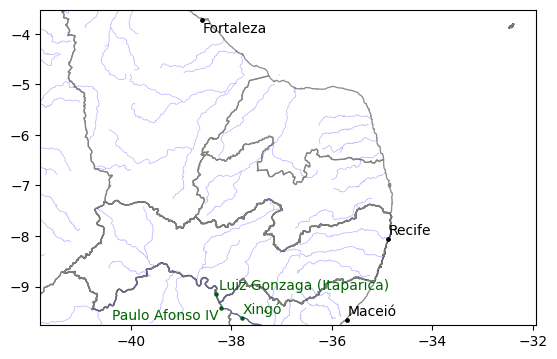

In [10]:
ax.figure

In [12]:
rivers = mapreporter.shapes['rivers']['gdf']

In [13]:
rivers.head()

,IDRIO,CORIO,NORIOCOMP,NUDISTBACR,NUCOMPRIO,DSVERSAO,geometry
0,155,464242_0,Arroio Buyayo,3131.298575,159.495424,BHO 2012 versao 2.2 de 19/08/2014,"MULTILINESTRING ((-68.46562 -11.53204, -68.461..."
1,197,7984_1,Arroio Candiota,322.704630,101.637135,BHO 2012 versao 2.2 de 19/08/2014,"MULTILINESTRING ((-53.69118 -31.33217, -53.696..."
2,234,82272_0,Arroio Caraguatá,854.181155,104.787637,BHO 2012 versao 2.2 de 19/08/2014,"MULTILINESTRING ((-54.90022 -31.96342, -54.900..."
3,266,82624_0,Arroio Caverá,1127.954238,103.090106,BHO 2012 versao 2.2 de 19/08/2014,"MULTILINESTRING ((-55.44998 -30.08970, -55.456..."
4,424,46418_0,Arroio Flórida,2816.058746,100.498747,BHO 2012 versao 2.2 de 19/08/2014,"MULTILINESTRING ((-65.82393 -11.22371, -65.815..."


<Axes: >

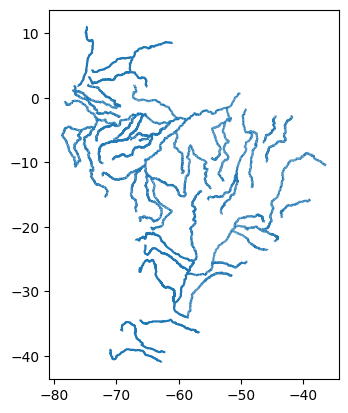

In [14]:
rivers.sort_values('NUCOMPRIO', ascending=False).iloc[:50].plot()

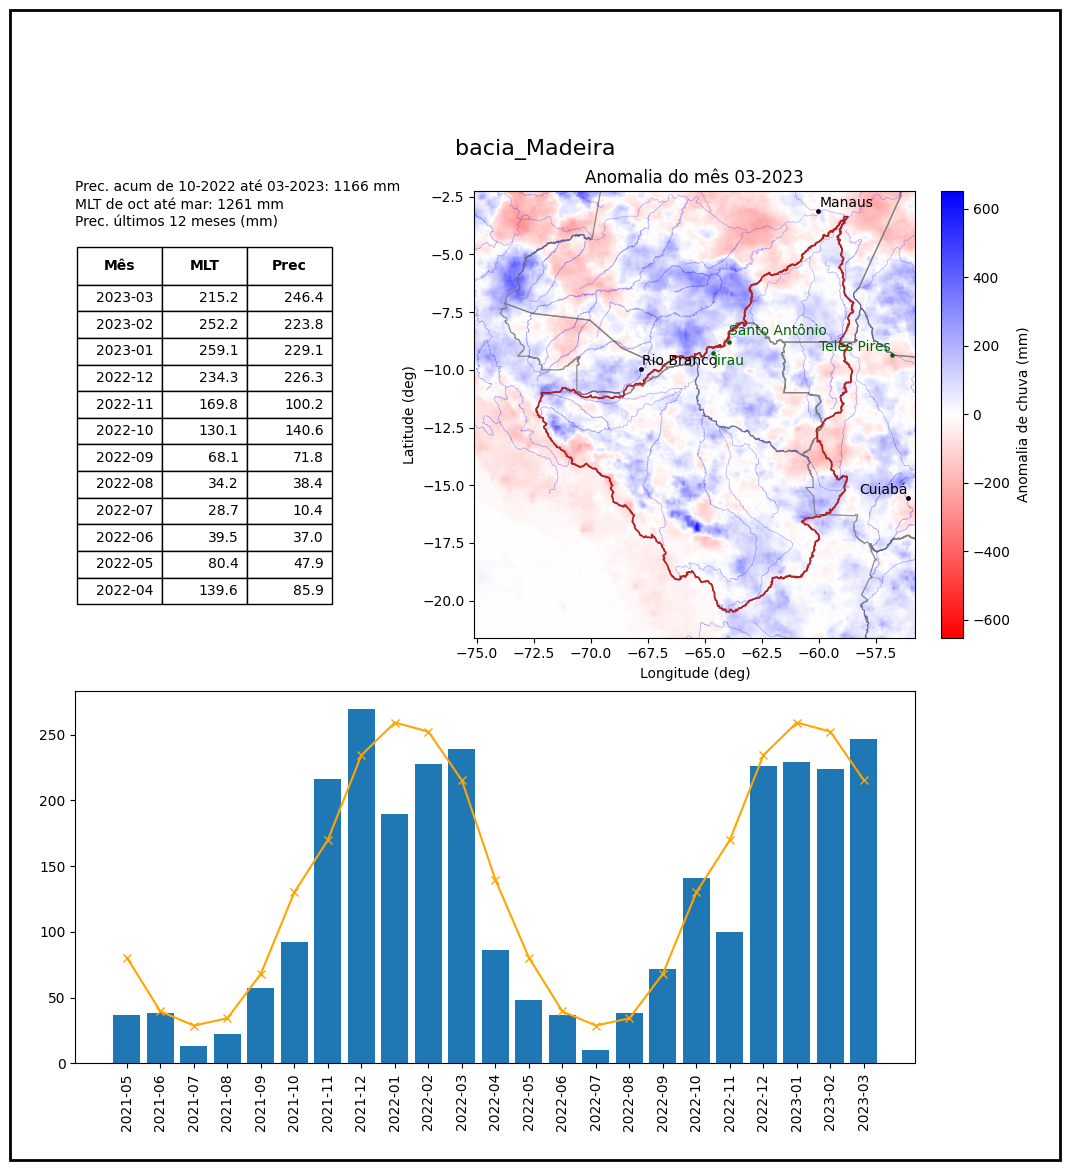

In [15]:
axs, rain_ts, lta_ts, shp = reporter.monthly_anomaly_report(
    date_str='2023-03',
    shapefile='/workspaces/bases/bacias de interesse SOE/bacia_Madeira.shp',
)

In [190]:
xmin, ymin, xmax, ymax = shp.total_bounds

In [46]:
sl = slice(0, 10)

In [1]:
ax.set_ylim?

Object `ax.set_ylim` not found.


In [6]:
reporter.config

{'shapefiles': {'cities': '../data/cities/cidades.shp',
  'states': '../data/states/BR_UF_2022.shp',
  'rivers': '../data/rivers/main_rivers.shp',
  'dams': '../data/dams/'}}

In [8]:
reporter.map_reporter

In [ ]:
shapes = reporter.config['shapefiles']

In [ ]:
for shape in shapes:
    gpd.read_file(shapes[shape])
    print(shapes[shape])

../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams/
